# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import seaborn as sns
import pandas as pd
import numpy as np

2023-01-18 15:36:19.162220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 15:36:19.565213: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 15:36:19.565237: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 15:36:20.653256: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
### Data generation
data = sklearn.datasets.make_moons(n_samples=10000, shuffle=True, noise=0.2, random_state=None)

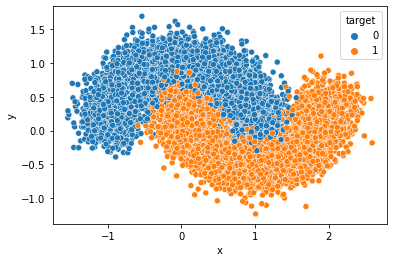

In [3]:
### This function allows to plot the two moons
def plot_moons(data):
    """data est un numpy array en 2D"""
    df = pd.DataFrame({"x": data[0][:,0], "y": data[0][:,1], "target": data[1]})
    sns.scatterplot(data=df, x="x", y="y", hue="target")

plot_moons(data)

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [4]:
data = sklearn.datasets.make_moons(n_samples=250, shuffle=True, noise=0.2, random_state=None)
X = data[0][:]
Y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [1]:
def initialize_model():
    
    
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
    opt = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = initialize_model()

NameError: name 'Sequential' is not defined

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [7]:
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=10, verbose=1)

Epoch 1/30
12/12 [==============================] - 1s 15ms/step - loss: 0.5442 - accuracy: 0.7607 - val_loss: 0.5060 - val_accuracy: 0.8276
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4812 - accuracy: 0.7607 - val_loss: 0.4540 - val_accuracy: 0.8276
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.7607 - val_loss: 0.4236 - val_accuracy: 0.8276
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 0.4134 - accuracy: 0.7607 - val_loss: 0.4030 - val_accuracy: 0.8103
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.8034 - val_loss: 0.3911 - val_accuracy: 0.8276
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.3759 - accuracy: 0.8034 - val_loss: 0.3727 - val_accuracy: 0.8276
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.3608 - accuracy: 0.8034 - val_loss: 0.3588 - val_accuracy: 0.8448
Epoch 8/30
12/12 [=

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [8]:
print(hist.__dict__)

{'validation_data': None, 'model': <keras.engine.sequential.Sequential object at 0x7fdba0dbefb0>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [0.5442358255386353, 0.4811931848526001, 0.4423825144767761, 0.4134071171283722, 0.3922851085662842, 0.37591612339019775, 0.36081814765930176, 0.3474268317222595, 0.3371789753437042, 0.3273178040981293, 0.3199247121810913, 0.31387078762054443, 0.30593064427375793, 0.3017558455467224, 0.2970593571662903, 0.29660114645957947, 0.2927720844745636, 0.2894003689289093, 0.29260528087615967, 0.2857217490673065, 0.28460633754730225, 0.283930242061615, 0.2806251049041748, 0.28521889448165894, 0.28077077865600586, 0.2792913615703583, 0.2809499204158783, 0.2813459634780884, 0.2782512307167053, 0.27898070216178894], 'accuracy': [0.7606837749481201, 0.7606837749481201, 0.7606837749481201, 0.7606837749481201, 0.8034188151359558, 0.8034188151359558, 0.8034188151359558, 0.8376068472862244, 0.8376068472862244, 0.8461538553237915, 0.

❓ Plot the history of the train loss using the following function

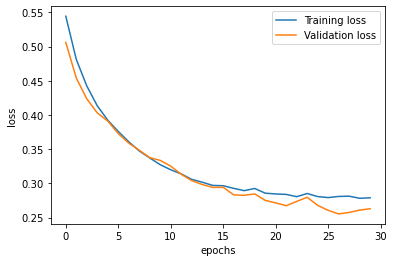

In [9]:
def plot_training_history(history):
    
    sns.lineplot(x=hist.__dict__["epoch"], y=hist.history["loss"], label="Training loss")
    sns.lineplot(x=hist.__dict__["epoch"], y=hist.history["val_loss"], label="Validation loss").set(xlabel='epochs', 
                                                                                                    ylabel='loss')

plot_training_history(hist)

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [10]:
y_pred = model.predict(np.array([[0.5, -0.5]]))
print(y_pred)

1/1 [==============================] - 0s 66ms/step
[[0.9500673]]


You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [11]:
model.evaluate(x=X_test, y=y_test, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8667


[0.29369932413101196, 0.8666666746139526]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [12]:
test_accuracy = model.evaluate(x=X_test, y=y_test, verbose=1)[1]
print(test_accuracy)

3/3 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8667
0.8666666746139526


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

1768/1768 [==============================] - 1s 814us/step


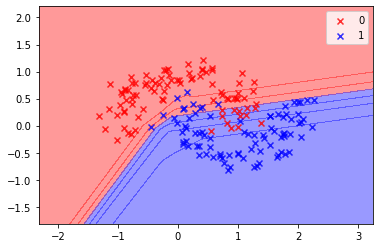

In [13]:
from utils import plots
plots.plot_decision_regions(X_train, y_train, model)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [14]:
model = initialize_model()
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=500, batch_size=10, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 22ms/step - loss: 0.6796 - accuracy: 0.4359 - val_loss: 0.6093 - val_accuracy: 0.5345
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.5214 - val_loss: 0.5595 - val_accuracy: 0.7586
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5613 - accuracy: 0.7265 - val_loss: 0.5205 - val_accuracy: 0.8103
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5253 - accuracy: 0.7607 - val_loss: 0.4902 - val_accuracy: 0.8103
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4940 - accuracy: 0.8034 - val_loss: 0.4685 - val_accuracy: 0.8103
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.8291 - val_loss: 0.4324 - val_accuracy: 0.8103
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4239 - accuracy: 0.8291 - val_loss: 0.4027 - val_accuracy: 0.8276
Epoch 8/500


Epoch 59/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.8547 - val_loss: 0.2990 - val_accuracy: 0.8966
Epoch 60/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.8632 - val_loss: 0.2907 - val_accuracy: 0.8793
Epoch 61/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2877 - accuracy: 0.8547 - val_loss: 0.2961 - val_accuracy: 0.8966
Epoch 62/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8718 - val_loss: 0.2973 - val_accuracy: 0.8966
Epoch 63/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.8632 - val_loss: 0.2911 - val_accuracy: 0.8966
Epoch 64/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.8547 - val_loss: 0.2893 - val_accuracy: 0.8966
Epoch 65/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 0.8547 - val_loss: 0.2896 - val_accuracy: 0.8966
Epoch 

12/12 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.8547 - val_loss: 0.2901 - val_accuracy: 0.8966
Epoch 174/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.8547 - val_loss: 0.2886 - val_accuracy: 0.8966
Epoch 175/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.8632 - val_loss: 0.2821 - val_accuracy: 0.8966
Epoch 176/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2772 - accuracy: 0.8632 - val_loss: 0.2882 - val_accuracy: 0.8966
Epoch 177/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2757 - accuracy: 0.8632 - val_loss: 0.2844 - val_accuracy: 0.8966
Epoch 178/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2757 - accuracy: 0.8632 - val_loss: 0.2796 - val_accuracy: 0.8966
Epoch 179/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.8632 - val_loss: 0.2865 - val_accuracy: 0.8966
Epoch 180/500

12/12 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.8718 - val_loss: 0.2731 - val_accuracy: 0.8621
Epoch 288/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.8718 - val_loss: 0.2749 - val_accuracy: 0.8621
Epoch 289/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2522 - accuracy: 0.8718 - val_loss: 0.2680 - val_accuracy: 0.8621
Epoch 290/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.8718 - val_loss: 0.2719 - val_accuracy: 0.8621
Epoch 291/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.8718 - val_loss: 0.2754 - val_accuracy: 0.8621
Epoch 292/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.8718 - val_loss: 0.2753 - val_accuracy: 0.8621
Epoch 293/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.8718 - val_loss: 0.2740 - val_accuracy: 0.8621
Epoch 294/500

12/12 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.8803 - val_loss: 0.2643 - val_accuracy: 0.8621
Epoch 402/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2413 - accuracy: 0.8803 - val_loss: 0.2666 - val_accuracy: 0.8621
Epoch 403/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2404 - accuracy: 0.8718 - val_loss: 0.2655 - val_accuracy: 0.8621
Epoch 404/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.8803 - val_loss: 0.2694 - val_accuracy: 0.8621
Epoch 405/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2419 - accuracy: 0.8974 - val_loss: 0.2781 - val_accuracy: 0.8621
Epoch 406/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2417 - accuracy: 0.9060 - val_loss: 0.2684 - val_accuracy: 0.8621
Epoch 407/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.8974 - val_loss: 0.2697 - val_accuracy: 0.8621
Epoch 408/500

3/3 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8667
Testing accuracy:  [0.2585235834121704, 0.8666666746139526]


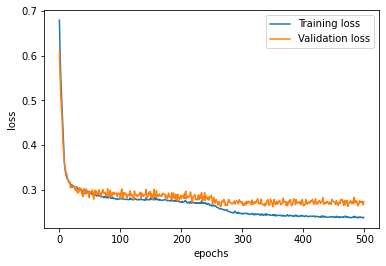

In [15]:
plot_training_history(hist)
print("Testing accuracy: ", model.evaluate(x=X_test, y=y_test, verbose=1))

❓ Did the test accuracy improve?

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [16]:
def initialize_bigger_model():
    
    
    model = Sequential()
    model.add(Dense(20, input_dim=2, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
    opt = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = initialize_bigger_model()
    

❓ What is the number of parameters of your new model?

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [18]:
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=500, batch_size=10, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 14ms/step - loss: 0.6737 - accuracy: 0.5385 - val_loss: 0.6632 - val_accuracy: 0.4483
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.5385 - val_loss: 0.6481 - val_accuracy: 0.4483
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.5385 - val_loss: 0.6343 - val_accuracy: 0.4483
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6256 - accuracy: 0.5385 - val_loss: 0.6203 - val_accuracy: 0.4483
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6081 - accuracy: 0.5641 - val_loss: 0.6054 - val_accuracy: 0.5862
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.6154 - val_loss: 0.5907 - val_accuracy: 0.6034
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.7778 - val_loss: 0.5771 - val_accuracy: 0.7241
Epoch 8/500


Epoch 59/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.9060 - val_loss: 0.1899 - val_accuracy: 0.9310
Epoch 60/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9060 - val_loss: 0.1873 - val_accuracy: 0.9483
Epoch 61/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2206 - accuracy: 0.9060 - val_loss: 0.1838 - val_accuracy: 0.9483
Epoch 62/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.9060 - val_loss: 0.1888 - val_accuracy: 0.9483
Epoch 63/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9060 - val_loss: 0.1823 - val_accuracy: 0.9483
Epoch 64/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2139 - accuracy: 0.9145 - val_loss: 0.1776 - val_accuracy: 0.9655
Epoch 65/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2102 - accuracy: 0.9231 - val_loss: 0.1749 - val_accuracy: 0.9655
Epoch 

12/12 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9829 - val_loss: 0.0879 - val_accuracy: 0.9828
Epoch 174/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9744 - val_loss: 0.0840 - val_accuracy: 0.9828
Epoch 175/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9744 - val_loss: 0.0840 - val_accuracy: 0.9828
Epoch 176/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9744 - val_loss: 0.0901 - val_accuracy: 0.9828
Epoch 177/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9744 - val_loss: 0.0905 - val_accuracy: 0.9655
Epoch 178/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0725 - accuracy: 0.9744 - val_loss: 0.0779 - val_accuracy: 0.9828
Epoch 179/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9744 - val_loss: 0.0900 - val_accuracy: 0.9828
Epoch 180/500

12/12 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9829 - val_loss: 0.1002 - val_accuracy: 0.9828
Epoch 288/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9829 - val_loss: 0.0927 - val_accuracy: 0.9828
Epoch 289/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9829 - val_loss: 0.1036 - val_accuracy: 0.9655
Epoch 290/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9829 - val_loss: 0.1047 - val_accuracy: 0.9655
Epoch 291/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9829 - val_loss: 0.0944 - val_accuracy: 0.9828
Epoch 292/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9829 - val_loss: 0.0975 - val_accuracy: 0.9828
Epoch 293/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0507 - accuracy: 0.9829 - val_loss: 0.1049 - val_accuracy: 0.9655
Epoch 294/500

12/12 [==============================] - 0s 5ms/step - loss: 0.0420 - accuracy: 0.9829 - val_loss: 0.1170 - val_accuracy: 0.9483
Epoch 402/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9829 - val_loss: 0.1203 - val_accuracy: 0.9483
Epoch 403/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9915 - val_loss: 0.1115 - val_accuracy: 0.9483
Epoch 404/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9915 - val_loss: 0.1243 - val_accuracy: 0.9483
Epoch 405/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9915 - val_loss: 0.1183 - val_accuracy: 0.9483
Epoch 406/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9915 - val_loss: 0.1058 - val_accuracy: 0.9483
Epoch 407/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9915 - val_loss: 0.1098 - val_accuracy: 0.9483
Epoch 408/500

3/3 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.9333
Testing accuracy:  [0.2966092824935913, 0.9333333373069763]


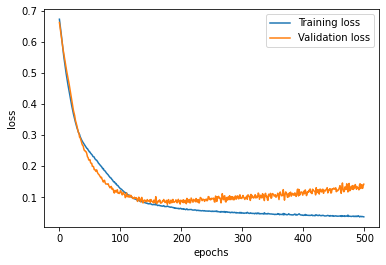

In [19]:
plot_training_history(hist)
accuracy_deep = model.evaluate(x=X_test, y=y_test, verbose=1)
print("Testing accuracy: ", accuracy_deep)

❓ Do you think we have overfitted on the noise? Check it out below

**Sur le graphique ci-dessus, on constate que le modèle est en overfit. En effet, la validation loss augmente à partir d'un certain temps lors de l'entraînement, ce qui suggère que le modèle est en surapprentissage. Sans regarder les métriques de validation, on peut aussi regarder le plot des régions de décision :**

1768/1768 [==============================] - 2s 841us/step


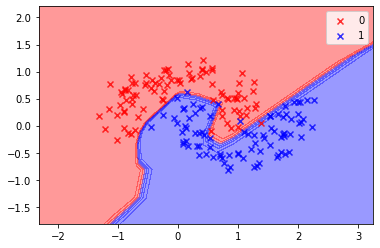

In [20]:
plots.plot_decision_regions(X_train, y_train, model)

On constate que le modèle est effectivement en overfit. En effet, les limites suivent de très prêt le jeu de données d'entraînement, ce qui dénote d'une mauvaise capacité à généraliser.